In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

in this model some image of traffic sign are used to train so the model used in vehicles can predict what to do

In [3]:
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

41

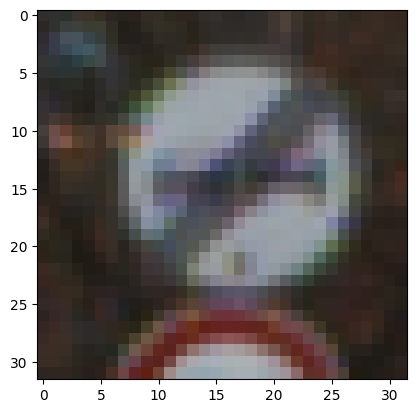

In [6]:
plt.imshow(X_train[69])
y_train[52]

In [7]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [8]:
X_train

array([[[[ 34,  32,  38],
         [ 34,  32,  38],
         [ 30,  30,  36],
         ...,
         [ 24,  24,  30],
         [ 25,  25,  31],
         [ 22,  23,  29]],

        [[ 32,  31,  36],
         [ 31,  30,  34],
         [ 30,  29,  34],
         ...,
         [ 24,  24,  30],
         [ 24,  24,  30],
         [ 22,  23,  29]],

        [[ 31,  31,  36],
         [ 30,  29,  33],
         [ 30,  29,  34],
         ...,
         [ 25,  24,  30],
         [ 25,  25,  30],
         [ 24,  24,  29]],

        ...,

        [[ 30,  29,  35],
         [ 31,  29,  36],
         [ 32,  28,  35],
         ...,
         [ 28,  28,  37],
         [ 30,  28,  35],
         [ 29,  26,  32]],

        [[ 31,  30,  36],
         [ 31,  29,  34],
         [ 31,  28,  33],
         ...,
         [ 28,  28,  35],
         [ 29,  27,  34],
         [ 28,  26,  32]],

        [[ 31,  29,  35],
         [ 32,  29,  35],
         [ 31,  28,  34],
         ...,
         [ 29,  27,  34],
        

In [9]:
X_train_gray = np.sum(X_train/3,axis = 3,keepdims = True)
X_test_gray = np.sum(X_test/3,axis = 3,keepdims = True)
X_validation__gray = np.sum(X_validation/3,axis = 3,keepdims = True)

In [10]:
X_train_gray = np.round(X_train_gray, decimals=3)
X_test_gray = np.round(X_test_gray, decimals=3)
X_validation__gray = np.round(X_validation__gray, decimals=3)
X_train_gray

array([[[[ 34.667],
         [ 34.667],
         [ 32.   ],
         ...,
         [ 26.   ],
         [ 27.   ],
         [ 24.667]],

        [[ 33.   ],
         [ 31.667],
         [ 31.   ],
         ...,
         [ 26.   ],
         [ 26.   ],
         [ 24.667]],

        [[ 32.667],
         [ 30.667],
         [ 31.   ],
         ...,
         [ 26.333],
         [ 26.667],
         [ 25.667]],

        ...,

        [[ 31.333],
         [ 32.   ],
         [ 31.667],
         ...,
         [ 31.   ],
         [ 31.   ],
         [ 29.   ]],

        [[ 32.333],
         [ 31.333],
         [ 30.667],
         ...,
         [ 30.333],
         [ 30.   ],
         [ 28.667]],

        [[ 31.667],
         [ 32.   ],
         [ 31.   ],
         ...,
         [ 30.   ],
         [ 29.   ],
         [ 28.667]]],


       [[[105.333],
         [131.667],
         [192.333],
         ...,
         [140.333],
         [134.   ],
         [134.333]],

        [[ 55.333],
         [ 7

In [11]:
X_train_norm = (X_train_gray - 128) /128
X_test_norm = (X_test_gray - 128) /128
X_validation_norm = (X_validation__gray - 128) /128
X_train_norm.shape

(34799, 32, 32, 1)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [13]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

In [14]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

C:\Users\Tanim\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
trained_model = cnn_model.fit(X_train_norm,
                        y_train,
                        batch_size=500,
                        epochs=10,
                        verbose=1,
                        validation_data = (X_validation_norm,y_validation))

Epoch 1/10
70/70 [==============================] - 7s 83ms/step - loss: 3.1152 - accuracy: 0.1928 - val_loss: 2.5208 - val_accuracy: 0.2932
Epoch 2/10
70/70 [==============================] - 6s 85ms/step - loss: 1.5415 - accuracy: 0.5621 - val_loss: 1.3243 - val_accuracy: 0.6243
Epoch 3/10
70/70 [==============================] - 6s 88ms/step - loss: 0.8857 - accuracy: 0.7442 - val_loss: 0.9993 - val_accuracy: 0.6995
Epoch 4/10
70/70 [==============================] - 7s 95ms/step - loss: 0.6324 - accuracy: 0.8238 - val_loss: 0.8488 - val_accuracy: 0.7621
Epoch 5/10
70/70 [==============================] - 7s 101ms/step - loss: 0.5043 - accuracy: 0.8628 - val_loss: 0.7509 - val_accuracy: 0.7893
Epoch 6/10
70/70 [==============================] - 7s 102ms/step - loss: 0.4254 - accuracy: 0.8850 - val_loss: 0.7304 - val_accuracy: 0.7982
Epoch 7/10
70/70 [==============================] - 7s 102ms/step - loss: 0.3677 - accuracy: 0.9032 - val_loss: 0.6839 - val_accuracy: 0.8141
Epoch 8/10

In [16]:
score = cnn_model.evaluate(X_test_norm, y_test,verbose=0)
print(score[1])

0.8166270852088928


In [17]:
y_pred = cnn_model.predict(X_test_norm)
y_pred

395/395 [==============================] - 2s 4ms/step


array([[4.0657510e-16, 1.1084762e-20, 6.9964377e-20, ..., 3.2400170e-08,
        3.5501353e-09, 9.1140142e-12],
       [5.2995685e-05, 9.9793988e-01, 1.9778656e-03, ..., 2.5545632e-11,
        1.3928359e-12, 2.8171608e-12],
       [2.8085672e-19, 2.3134820e-20, 2.7439463e-19, ..., 5.5345869e-16,
        1.4221797e-13, 2.4017975e-21],
       ...,
       [2.4539948e-04, 1.3493067e-01, 1.4109738e-02, ..., 1.0955211e-05,
        6.3593748e-06, 3.0596749e-07],
       [1.6234998e-06, 6.7922589e-03, 1.1775867e-02, ..., 7.8213261e-04,
        1.3063917e-05, 7.9708960e-05],
       [1.1003702e-09, 5.0182723e-05, 3.2320302e-02, ..., 1.6874229e-04,
        1.4906434e-11, 1.5520392e-10]], dtype=float32)